<a href="https://colab.research.google.com/github/cyan9212/Machine_Learning_Basics/blob/main/metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class FakeClassifier(BaseEstimator):
  def fit(self, x, y):
    pass
  
  def predict(self, x):
    return np.zeros((len(x),1), dtype=bool)
  
digits = load_digits()

y = (digits.target == 7).astype(int)
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [2]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:',y_test.shape)
print('테스트 세트 레이블 0과 1 분포도')
print(pd.Series(y_test).value_counts())

#dummy classifier 로 학습/예측/정확도 평가
fakeclf = FakeClassifier()
fakeclf.fit(x_train, y_train)
fakepred = fakeclf.predict(x_test)
print('모든 예측을 0으로 하여 정확도는 {:.3}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여 정확도는 0.9


In [3]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 score: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [5]:
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.preprocessing import LabelEncoder
uploaded = files.upload()

def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

#원본 데이터를 재로딩, 데이터를 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
x_titanic_df.info()

Saving titanic_train.csv to titanic_train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [6]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba() 결과 shape: {0}'.format(pred_proba.shape))
print('pred_proba() array에서 앞 3개만 샘플로 추출\n', pred_proba[:3])

#예측 확률 array와 예측 결과값 array를 병합해 예측 확률과 결과값을 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)

#두개의 class  중에서 더 큰 확률을 클래스 값으로 예측
print(pred_proba_result[:3])

pred_proba() 결과 shape: (179, 2)
pred_proba() array에서 앞 3개만 샘플로 추출
 [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]
[[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


In [12]:
from sklearn.preprocessing import Binarizer

x = [[1, -1, 2], [2, 0, 0], [0, 1, 1.2]]

#x의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [18]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
오차행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


In [19]:
thresholds = [0.4, 0.45,0.5, 0.55,0.60 ]

def get_eval_by_threshold(y_test, pred_proba, threshold):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
    custom_predict = binarizer.transform(pred_proba)
    get_clf_eval(y_test, custom_predict)
  
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

오차행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
오차행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
오차행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
오차행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


In [28]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률
pred_data_class1 = lr_clf.predict_proba(x_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_data_class1)
print('반환된 분류 결정 임계값 배열의 shape:', thresholds.shape)

#반환된 임계값 배열 로우가 143건 이므로 샘플로 10건만 추출하되, 입계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율
print('샘플 임계값 별 정밀도:', np.round(precisions[thr_index],2))
print('샘플 임계값 별 재현율:', np.round(recalls[thr_index],2))

반환된 분류 결정 임계값 배열의 shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값 별 정밀도: [0.39 0.44 0.47 0.54 0.65 0.73 0.84 0.95 0.96 1.  ]
샘플 임계값 별 재현율: [1.   0.97 0.9  0.9  0.9  0.84 0.75 0.61 0.38 0.15]


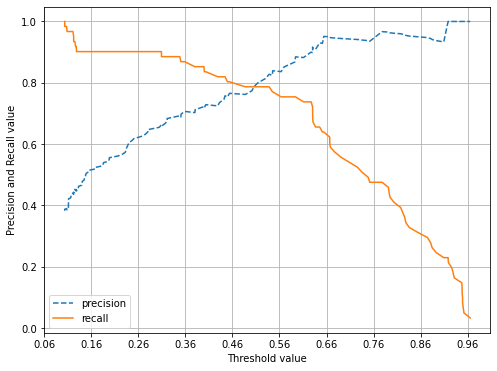

In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
  
  #threshold 값 x축의 scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  
  #x축, y축 label과 legend, grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()


pred_proba_c = pred_proba[:,1].reshape(-1,1)
precision_recall_curve_plot(y_test, pred_proba_c)

In [49]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 score: {0:.4f}'.format(f1))

F1 score: 0.7805


In [53]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

오차행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1 score: 0.7727
오차행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1 score: 0.7840
오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1 score: 0.7805
오차행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1 score: 0.7931
오차행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1 score: 0.8036


In [61]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_c = lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c)
#반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출
#thresholds[0]는 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임계값 배열의 index:', thr_index)
print('샘플 index로 추출한 임계값:', np.round(thresholds[thr_index],2))

# 5step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값 별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임계값 별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값 별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값 별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


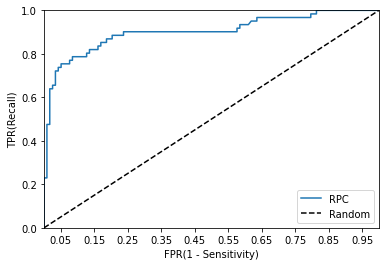

In [65]:
def roc_curve_plot(y_test, pred_proba_c):
  #임계값에 따른 FPR, TPR 값을 반환받음
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c)
  #ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs, tprs, label='RPC')
  #가운데 대각선 직선을 그림
  plt.plot([0,1],[0,1], 'k--',label="Random")

  #FPR X축의 Scale을 0.1단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
  plt.legend()
  
roc_curve_plot(y_test, pred_proba_c)

In [67]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(x_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC: {0:.4f}'.format(roc_score))

ROC AUC: 0.9024


In [75]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1 score: 0.7805, ROC-AUC: 0.9024
